In [1]:
#[batch, in_height, in_width, in_channels]

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [26]:
import tensorflow as tf
from keras.callbacks import TensorBoard
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D,MaxPooling2D

In [6]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_test.shape

(10000, 28, 28)

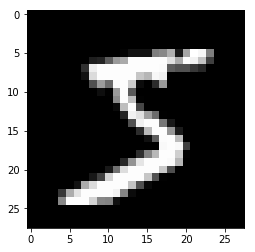

In [10]:
plt.imshow(x_train[0],cmap=plt.get_cmap("gray"))
plt.show()

In [11]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)


In [21]:
batch_size=128
epochs=2
num_classes=10

In [27]:
tensorboard=TensorBoard(log_dir="D:/DS Training Videos/ML algo script/9.Neural Networks/Logs",write_images=True)

In [14]:
x_train=x_train/255
x_test=x_test/255

In [15]:
y_train[0]

5

In [16]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [17]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu',
                input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu',
                ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))


In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [22]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data = (x_test,y_test),callbacks=[tensorboard])

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 95s 2ms/step - loss: 0.2394 - accuracy: 0.9274 - val_loss: 0.0555 - val_accuracy: 0.9821
Epoch 2/2
60000/60000 [==============================] - 90s 1ms/step - loss: 0.0879 - accuracy: 0.9740 - val_loss: 0.0403 - val_accuracy: 0.9867


In [29]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Test Loss', score[0])
print('Test Accuracy', score[1])

Test Loss 0.04026830597089138
Test Accuracy 0.9866999983787537


In [30]:
pred = model.predict(x_test)
pred[0]

array([1.6239737e-08, 1.4262525e-08, 5.9009705e-07, 4.6049554e-05,
       5.4442020e-11, 4.1571703e-08, 1.8727802e-11, 9.9995005e-01,
       6.5976991e-10, 3.1985214e-06], dtype=float32)

In [31]:
np.argmax(pred,axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

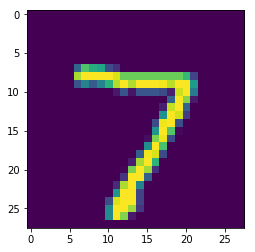

In [34]:
plt.imshow(x_test[0].reshape(28,28))